In [ ]:
! pip install xgboost

In [168]:
# importing all the required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import r2_score
from sklearn.model_selection import GridSearchCV

In [212]:
# importing the dataset
df=pd.read_csv(r"SeoulBikeData.csv",encoding='cp1252')

In [213]:
df.head(100)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,04/12/2017,248,23,-5.8,44,2.4,2000,-16.1,0.0,0.0,0.0,Winter,No Holiday,Yes
96,05/12/2017,216,0,-6.1,42,2.6,2000,-16.9,0.0,0.0,0.0,Winter,No Holiday,Yes
97,05/12/2017,198,1,-6.5,41,2.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
98,05/12/2017,124,2,-6.8,41,2.5,2000,-17.8,0.0,0.0,0.0,Winter,No Holiday,Yes


In [214]:
# checking the size and other attributes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [215]:
# converting to datetime format
df["Date"]=pd.to_datetime(df["Date"],format='%d/%m/%Y')

In [216]:
# checking the statistics of the numerical variables
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [217]:
# taking the quantitative and categorical variables in separate lists to analyse them.
num=set(df.select_dtypes(include='number').columns)-{"Hour"}
cat=df.select_dtypes(include='object').columns

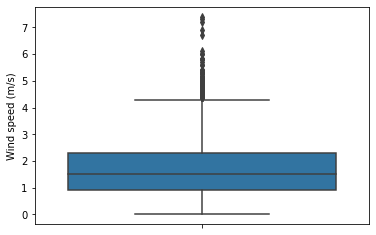

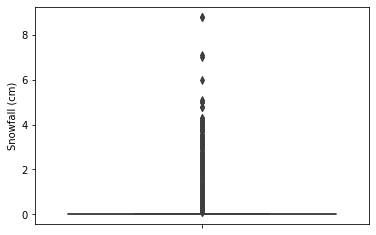

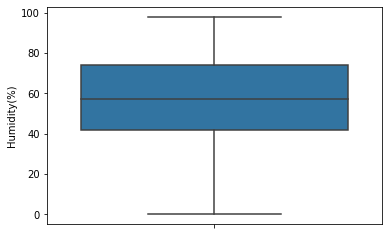

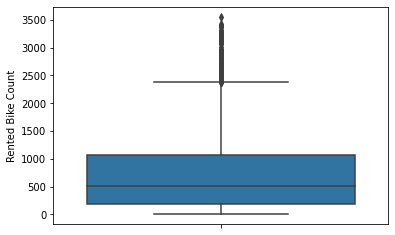

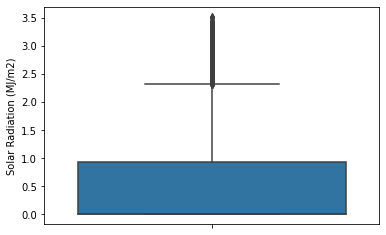

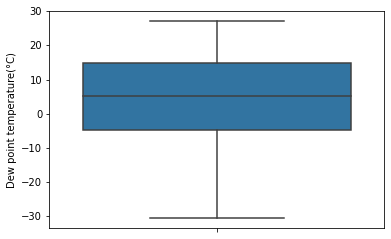

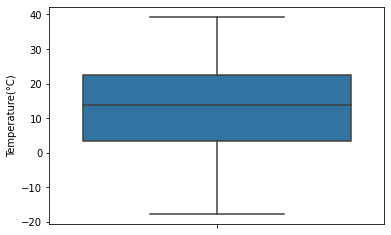

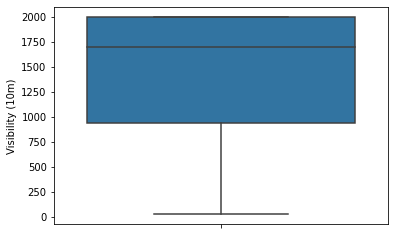

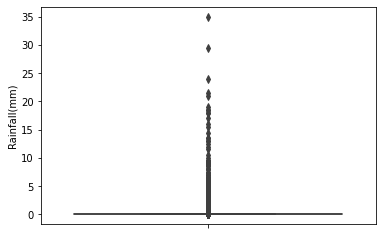

In [218]:
# univaraite analysis
# checking the boxplots of the numerical variables
for i in num :
    sns.boxplot(y=df[i])
    plt.show()

Observation : Outliers are present in the variables "Rainfall","Snowfall","Solar Radiation","Wind speed"

C:\Users\24480202\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


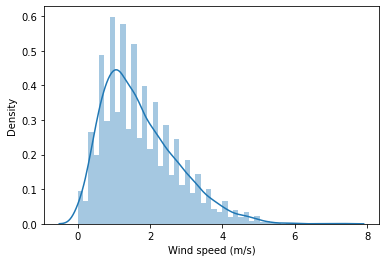

C:\Users\24480202\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


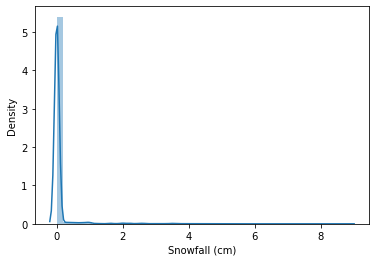

C:\Users\24480202\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


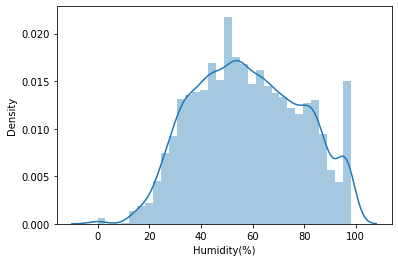

C:\Users\24480202\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


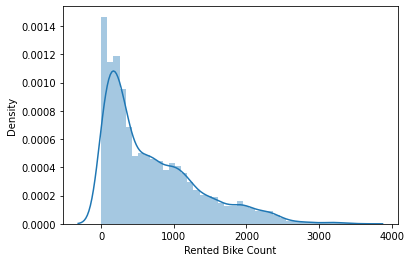

C:\Users\24480202\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


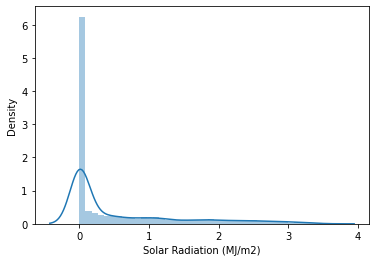

C:\Users\24480202\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


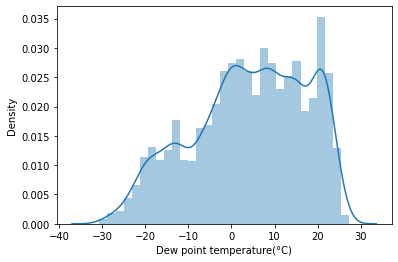

C:\Users\24480202\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


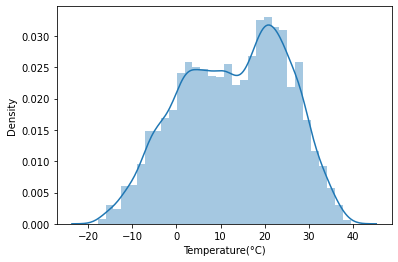

C:\Users\24480202\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


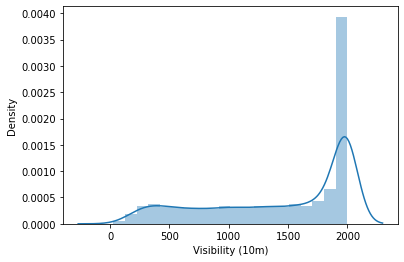

C:\Users\24480202\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


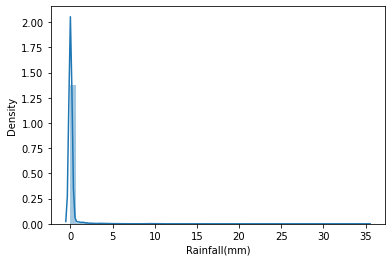

In [219]:
# checking the distribution of the quatitative variables through histograms & density plots
for i in num :
    sns.distplot(x=df[i])
    plt.xlabel(i)
    plt.show()

Observation : The distribution is skewed for variables Wind speed,Humidity,Solar Radiation,Dew point temperature,Visibility etc

C:\Users\24480202\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


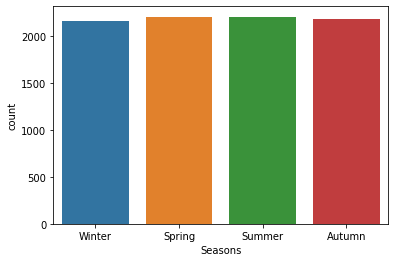

C:\Users\24480202\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


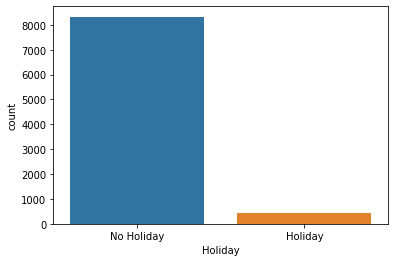

C:\Users\24480202\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


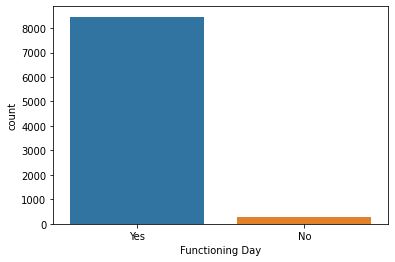

In [220]:
# performing univaraite analysis on the categorical variables
for i in cat:
    sns.countplot(df[i])
    plt.show()

<AxesSubplot:>

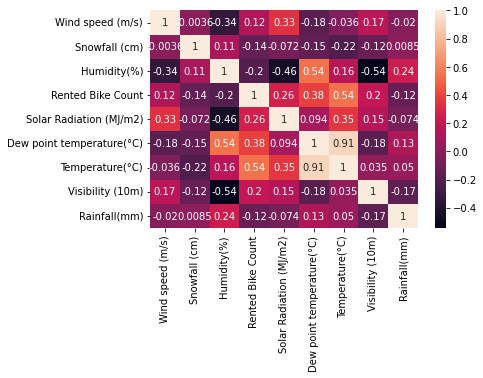

In [221]:
# Performing bivariate analysis
# checking the correlations between the quantitative variables
sns.heatmap(df[list(num)].corr(),annot=True)


# observations from correlation heatmap:
1.Dew point temperature has very high correlation with Temperature variable. So, one of these variables can be dropped during 
 model building
2. "Visibility" has moderate correlation  with "Humidity" (-0.54)
3. The variable "Temperature" has moderate correlation with output variable "Rented Bike Count" (0.54)

In [222]:
# dropping the variable Dew point temperature as it has high correlation with Temperature variable
df.drop(["Dew point temperature(°C)"],axis=1,inplace=True)

In [223]:
(df["Rainfall(mm)"].value_counts()/df["Rainfall(mm)"].value_counts().sum())*100

0.0     93.972603
0.5      1.324201
1.0      0.753425
1.5      0.639269
0.1      0.525114
          ...    
1.9      0.011416
3.3      0.011416
17.0     0.011416
1.4      0.011416
1.8      0.011416
Name: Rainfall(mm), Length: 61, dtype: float64

94% values in "Rainfall(mm)" are 0 only. At the same time "Rainfall(mm)"  variable has very weak correlation (-0.12)
with output variable "Rented Bike Count". So , we will drop this variable.

In [224]:
(df["Snowfall (cm)"].value_counts()/df["Snowfall (cm)"].value_counts().sum())*100

0.0    94.942922
0.3     0.479452
1.0     0.445205
0.9     0.388128
0.5     0.388128
0.7     0.353881
0.8     0.251142
2.0     0.251142
0.4     0.239726
1.6     0.216895
2.2     0.205479
0.2     0.171233
0.6     0.171233
3.5     0.159817
2.6     0.136986
2.5     0.114155
1.2     0.091324
2.7     0.068493
1.8     0.057078
3.0     0.057078
4.0     0.045662
4.1     0.045662
3.2     0.045662
1.3     0.045662
3.7     0.034247
3.3     0.034247
1.1     0.034247
3.8     0.034247
2.3     0.034247
2.1     0.034247
1.9     0.034247
1.7     0.034247
2.4     0.034247
3.4     0.022831
8.8     0.022831
2.8     0.022831
2.9     0.022831
0.1     0.022831
5.0     0.022831
4.8     0.022831
1.4     0.022831
3.9     0.022831
4.3     0.022831
5.1     0.011416
1.5     0.011416
3.1     0.011416
7.1     0.011416
7.0     0.011416
6.0     0.011416
3.6     0.011416
4.2     0.011416
Name: Snowfall (cm), dtype: float64

94% values in "Snowfall (cm)" are 0 only. At the same time "Snowfall (cm)"  variable has very weak correlation (0.14)
with output variable "Rented Bike Count". So , we will drop this variable.

In [225]:
# dropping the variables "Rainfall(mm)",'Snowfall (cm)'
df.drop(["Rainfall(mm)",'Snowfall (cm)'],axis=1,inplace=True)

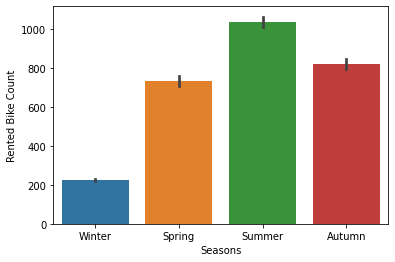

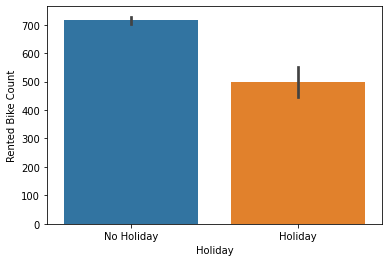

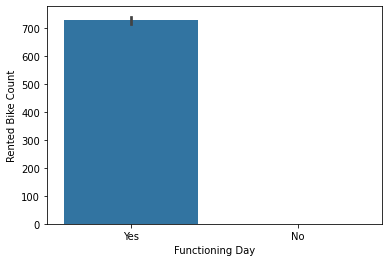

In [226]:
"""" Bivariate analysis of categorical variables with Output variable "Rented Bike Count" to see which variables
     are important for prediction """
for i in cat:
    sns.barplot(x=i,y="Rented Bike Count",data=df,estimator=np.mean)
    plt.show()

In [227]:
# checking the null values :
(df.isnull().sum()/len(df))*100

Date                       0.0
Rented Bike Count          0.0
Hour                       0.0
Temperature(°C)            0.0
Humidity(%)                0.0
Wind speed (m/s)           0.0
Visibility (10m)           0.0
Solar Radiation (MJ/m2)    0.0
Seasons                    0.0
Holiday                    0.0
Functioning Day            0.0
dtype: float64

 There are no null values in the data

In [231]:
def treat_outliers_iqr(df,col):
    data=df[col]
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    df=df[(df[col]>lwr_bound)|(df[col]<upr_bound)]
    return df

In [228]:
def treat_outliers_std(df,col):
    data=df[col]
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    lwr_bound = mean-(3*std)
    upr_bound = mean+(3*std)
    df=df[(df[col]>lwr_bound|df[col]<upr_bound)]
    return df


In [232]:
outlier_cols=['Solar Radiation (MJ/m2)','Wind speed (m/s)']

In [234]:
for col in outlier_cols :
    df=treat_outliers_iqr(df,col)
    print(col+" data treated")

Solar Radiation (MJ/m2) data treated
Wind speed (m/s) data treated


In [235]:
# converting the categorical variables to numerical form by using get dummies method
df=pd.concat([df[df.select_dtypes(include='number').columns],pd.get_dummies(df[cat],drop_first=True)],axis=1)


In [236]:
# taking the independent variables and dependent variable in X and y 
X=df.drop(["Rented Bike Count"],axis=1)
y=df["Rented Bike Count"]

In [237]:
# scaling the dataset
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [238]:
# performing the train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [239]:
models_dict={"Algorithm":[],"Train_data_r2_score":[],"Test_data_r2_score":[]}

In [240]:
algorithms=[LinearRegression(),RandomForestRegressor(),SVR(),XGBRegressor()]
for algo in algorithms :
    algo.fit(X_train,y_train)
    models_dict["Algorithm"].append(str(algo)[:-2])
    models_dict["Train_data_r2_score"].append(r2_score(y_train,algo.predict(X_train)))
    models_dict["Test_data_r2_score"].append(r2_score(y_test,algo.predict(X_test)))
    print("The training of algorithm  "+str(algo)[:-2]+" is complete")

The training of algorithm  LinearRegression is complete
The training of algorithm  RandomForestRegressor is complete
The training of algorithm  SVR is complete
The training of algorithm  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=Non is complete


In [241]:
df_results=pd.DataFrame(models_dict)
df_results

,Algorithm,Train_data_r2_score,Test_data_r2_score
0,LinearRegression,0.543417,0.498751
1,RandomForestRegressor,0.981212,0.843038
2,SVR,0.336972,0.316736
3,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.963370,0.836525


"""" Observation: The Random forest regressor has highest r2 score on test dataset (0.843) .
      So now we will implement gridsearch cv on random forest to get the best
     possible estimator """

In [243]:
# performing grid search cv on random forest regressor
param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=100, num=5)], 
         'max_depth' : [int(x) for x in np.linspace(start=10,stop=100, num=5)],
         'min_samples_leaf':[int(x) for x in np.linspace(start=2,stop=10, num=5)],}

rfr_gridSearch=GridSearchCV(RandomForestRegressor(),param,scoring='r2',cv=4)
rfr_gridSearch.fit(X_train,y_train)

best_rfr=rfr_gridSearch.best_estimator_


In [244]:
print("The best parameters are : ",rfr_gridSearch.best_params_)

The best parameters are :  {'max_depth': 55, 'min_samples_leaf': 2, 'n_estimators': 55}


In [246]:
print(" The r2 score on test dataset with best estimator is : ",r2_score(y_test,best_rfr.predict(X_test)))

 The r2 score on test dataset with best estimator is :  0.8455184939081931


 So , we have our best estimator with best r2 score of 0.84 on test dataset